### import all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read the Dataset

In [2]:
df=pd.read_csv(r"E:\Downloads\Car price Prediction - cgrinfo\CarPrice_Assignment.csv")

In [3]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Preprocessing the Data

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.duplicated().sum()

0

In [11]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [12]:
# Seprating categorical variable for Analysis with price column
df_cat = df[['CarName', 'fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype','cylindernumber','fuelsystem','price']]

In [13]:
df_cat

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi,16845.0
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,19045.0
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,21485.0
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,22470.0


In [14]:
df_cat.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'price'],
      dtype='object')

In [15]:
# Seprating Numeric Columns for Analysis with price
df_num = df.drop(columns=['CarName', 'fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype','cylindernumber','fuelsystem',],axis=1)

In [16]:
df_num

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [17]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 25.8 K

In [18]:
#check CarName columns
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

#### We can see the comapny name present in car name

 - . Split the comapny name

In [19]:
df['CompanyName'] = df['CarName'].apply(lambda x:  x.split(' ')[0])

In [20]:
df['CompanyName']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CompanyName, Length: 205, dtype: object

In [21]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# It seems that repeated name with diffrent spelling.

# Make it proper with unique name by replacing name of company

In [22]:
df['CompanyName'].replace({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'},inplace=True)

In [23]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [24]:
df.drop('CarName',axis=1,inplace=True)

In [25]:
df_cat.insert(3,'CompanyName',df['CompanyName'])

In [26]:
df_cat.drop('CarName',axis=1,inplace=True)

In [27]:
df_cat.columns

Index(['fueltype', 'aspiration', 'CompanyName', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'price'],
      dtype='object')

In [28]:
df_cat.shape

(205, 11)

In [29]:
# Price distribution Analysis
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

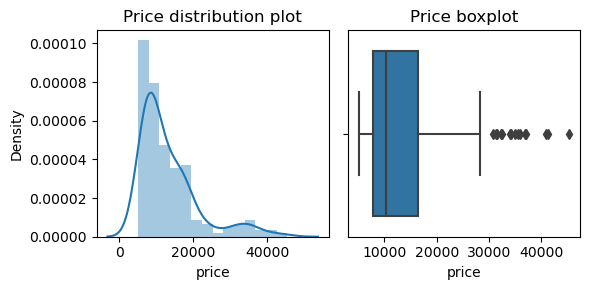

In [30]:
fig,ax=plt.subplots(1,2, figsize=(6,3))
sns.distplot(df_cat['price'],ax=ax[0])
ax[0].set_title('Price distribution plot')
sns.boxplot(df_cat['price'],ax=ax[1])
ax[1].set_title('Price boxplot')
plt.tight_layout()
plt.show()

### Vizualise the Data

In [ ]:
# Categorical Columns Analysis

# Fueltype :Car fuel type i.e gas or diesel

# Aspiration :Aspiration used in a car

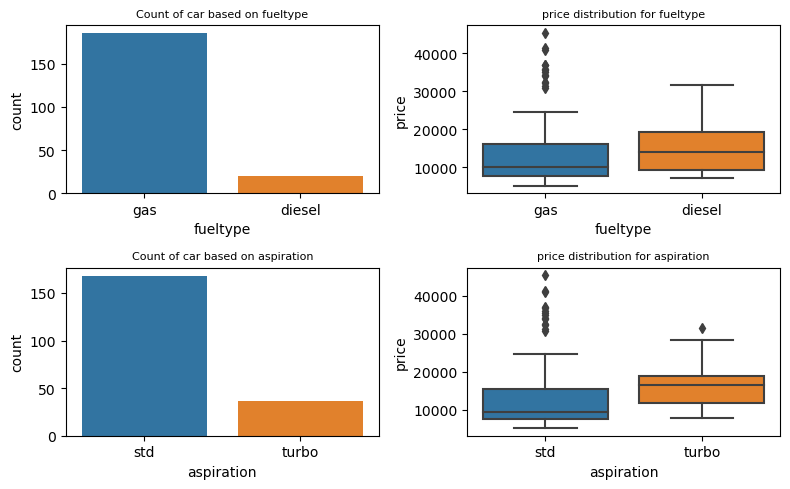

In [31]:
fig,ax=plt.subplots(2,2,figsize=(8,5))
sns.countplot(x=df_cat['fueltype'],ax=ax[0,0],data=df_cat)
ax[0,0].set_title('Count of car based on fueltype',size=8)
sns.boxplot(x='fueltype',y='price',ax=ax[0,1],data=df_cat)
ax[0,1].set_title('price distribution for fueltype',size=8)
sns.countplot(x=df_cat['aspiration'],ax=ax[1,0],data=df_cat)
ax[1,0].set_title('Count of car based on aspiration',size=8)
sns.boxplot(x='aspiration',y='price',ax=ax[1,1],data=df_cat)
ax[1,1].set_title('price distribution for aspiration',size=8)
plt.tight_layout()
plt.show()

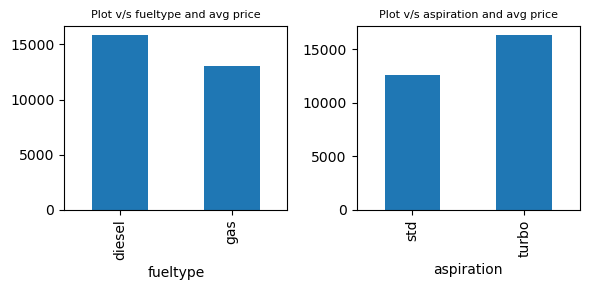

In [32]:
fig,ax=plt.subplots(1,2,figsize=(6,3))
df_cat.groupby('fueltype')['price'].mean().plot(kind='bar',ax=ax[0])
ax[0].set_title('Plot v/s fueltype and avg price',size=8)
df_cat.groupby('aspiration')['price'].mean().plot(kind='bar',ax=ax[1])
ax[1].set_title('Plot v/s aspiration and avg price',size=8)
plt.tight_layout()
plt.show()

 - 1- The count of gas fueltype is high and the price range is low then diesel fueltype, avg price also low then diesel type cars, we can observe the price varience with fueltype

- 2- turbo type aspiration have high avg price then std type, but the count of car have std type aspiration is more, it seems the variabtion of price based on spiration type.


In [ ]:
# doornumber

# carbody

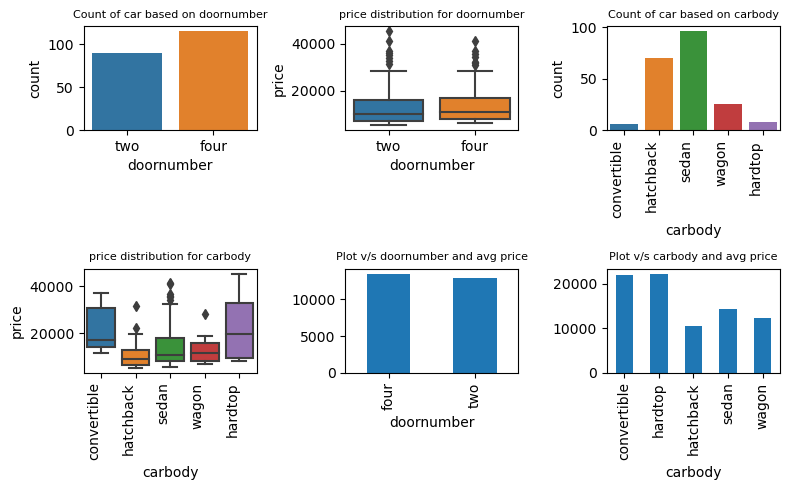

In [33]:
fig,ax=plt.subplots(2,3,figsize=(8,5))
sns.countplot(x=df_cat['doornumber'],ax=ax[0,0],data=df_cat)
ax[0,0].set_title('Count of car based on doornumber',size=8)
sns.boxplot(x='doornumber',y='price',ax=ax[0,1],data=df_cat)
ax[0,1].set_title('price distribution for doornumber',size=8)
sns.countplot(x=df_cat['carbody'],ax=ax[0,2],data=df_cat)
ax[0,2].set_title('Count of car based on carbody',size=8)
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=90, ha='right')
sns.boxplot(x='carbody',y='price',ax=ax[1,0],data=df_cat)
ax[1,0].set_title('price distribution for carbody',size=8)
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=90, ha='right')
df_cat.groupby('doornumber')['price'].mean().plot(kind='bar',ax=ax[1,1])
ax[1,1].set_title('Plot v/s doornumber and avg price',size=8)
df_cat.groupby('carbody')['price'].mean().plot(kind='bar',ax=ax[1,2])
ax[1,2].set_title('Plot v/s carbody and avg price',size=8)
plt.tight_layout()
plt.show()

 - 1- The price range is apporx same not much diffrence for doornumber

 - 2- For carbody the hardtop and convertible has highest pirce range then other, its a significant variable


In [ ]:
# check drivewheel enginelocation

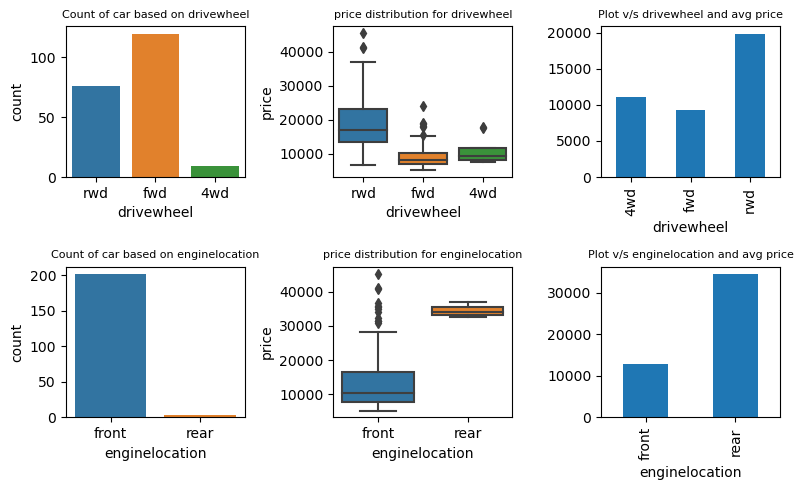

In [34]:
fig,ax=plt.subplots(2,3,figsize=(8,5))
sns.countplot(x=df_cat['drivewheel'],ax=ax[0,0],data=df_cat)
ax[0,0].set_title('Count of car based on drivewheel',size=8)
sns.boxplot(x='drivewheel',y='price',ax=ax[0,1],data=df_cat)
ax[0,1].set_title('price distribution for drivewheel',size=8)
df_cat.groupby('drivewheel')['price'].mean().plot(kind='bar',ax=ax[0,2])
ax[0,2].set_title('Plot v/s drivewheel and avg price',size=8)
sns.countplot(x=df_cat['enginelocation'],ax=ax[1,0],data=df_cat)
ax[1,0].set_title('Count of car based on enginelocation',size=8)
sns.boxplot(x='enginelocation',y='price',ax=ax[1,1],data=df_cat)
ax[1,1].set_title('price distribution for enginelocation',size=8)
df_cat.groupby('enginelocation')['price'].mean().plot(kind='bar',ax=ax[1,2])
ax[1,2].set_title('Plot v/s enginelocation and avg price',size=8)
plt.tight_layout()
plt.show()

In [35]:
df_cat['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [36]:
df_cat['enginelocation'].value_counts()/len(df_cat['enginelocation'])*100

front    98.536585
rear      1.463415
Name: enginelocation, dtype: float64

 - 1- only 1.4 percent data is rare type, it have low price varience.

 - 2- fwd drivewheel type have more count but rwd have high price range then the other, it is a significant variable

 ---> enginetype', 'cylindernumber

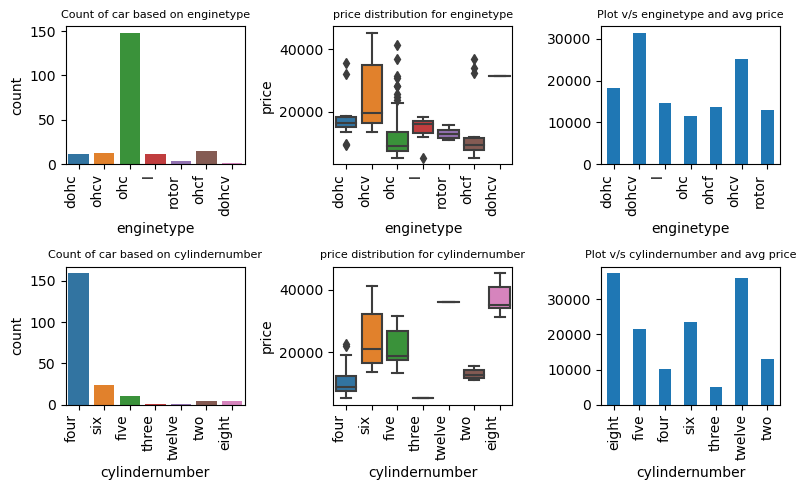

In [37]:
fig,ax=plt.subplots(2,3,figsize=(8,5))
# enginetype visualization
#1-Check the count of enginetype in present dat
sns.countplot(x=df_cat['enginetype'],ax=ax[0,0],data=df_cat)
ax[0,0].set_title('Count of car based on enginetype',size=8)
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=90, ha='right')

# check price distribution and range for each type
sns.boxplot(x='enginetype',y='price',ax=ax[0,1],data=df_cat)
ax[0,1].set_title('price distribution for enginetype',size=8)
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=90, ha='right')

# check avg price distibution based on enginetype
df_cat.groupby('enginetype')['price'].mean().plot(kind='bar',ax=ax[0,2])
ax[0,2].set_title('Plot v/s enginetype and avg price',size=8)
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=90, ha='right')

# Cylindernumber visualiztion
sns.countplot(x=df_cat['cylindernumber'],ax=ax[1,0],data=df_cat)
ax[1,0].set_title('Count of car based on cylindernumber',size=8)
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=90, ha='right')
sns.boxplot(x='cylindernumber',y='price',ax=ax[1,1],data=df_cat)
ax[1,1].set_title('price distribution for cylindernumber',size=8)
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90, ha='right')
df_cat.groupby('cylindernumber')['price'].mean().plot(kind='bar',ax=ax[1,2])
ax[1,2].set_title('Plot v/s cylindernumber and avg price',size=8)
plt.tight_layout()
plt.show()

 - 1- it seems that ohc have highest count then other, and ohcv have highest range then other.

 - 2- Count of car which have four cylinder is more then the other but the price range is high for eight and six cylindernumbers.



In [ ]:
# Check Fuel System

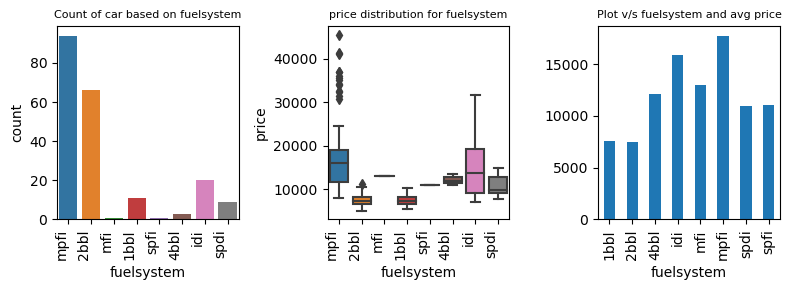

In [38]:
fig,ax=plt.subplots(1,3,figsize=(8,3))
sns.countplot(x=df_cat['fuelsystem'],ax=ax[0],data=df_cat)
ax[0].set_title('Count of car based on fuelsystem',size=8)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='right')
sns.boxplot(x='fuelsystem',y='price',ax=ax[1],data=df_cat)
ax[1].set_title('price distribution for fuelsystem',size=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
df_cat.groupby('fuelsystem')['price'].mean().plot(kind='bar',ax=ax[2])
ax[2].set_title('Plot v/s fuelsystem and avg price',size=8)
plt.tight_layout()
plt.show()

In [ ]:
# it seems that the price variation is much based on fuelsystem.

# mpfi and 2bbl have highest count then other but idi and mpfi have highest range of price, and 2bbl has lowest range of price

Text(0.5, 1.0, 'Plot v/s CompanyName and avg price')

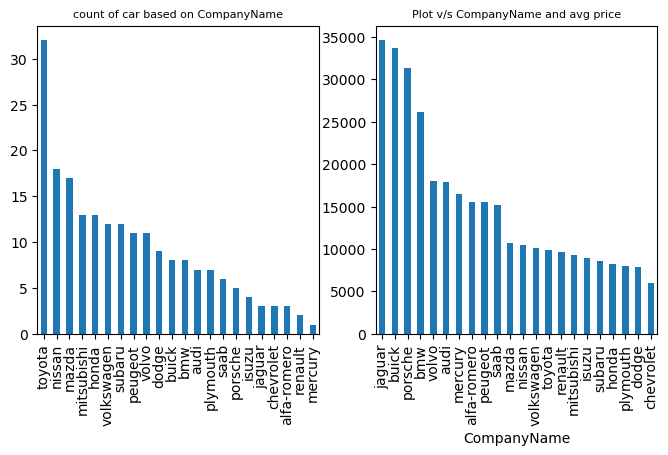

In [39]:
fig,ax=plt.subplots(1,2,figsize=(8,4))
df_cat['CompanyName'].value_counts().plot(kind='bar',ax=ax[0])
ax[0].set_title('count of car based on CompanyName',size=8)
df_cat.groupby('CompanyName')['price'].mean().sort_values(ascending=False).plot(kind='bar',ax=ax[1])
ax[1].set_title('Plot v/s CompanyName and avg price',size=8)

In [40]:
# It seems to high variation, but it difficult to dummification so need to make new feature based on avg price

df1 = df.groupby('CompanyName')['price'].mean()
df = df.merge(df1.reset_index(), how='left',on='CompanyName')

In [43]:
df1

CompanyName
alfa-romero    15498.333333
audi           17859.166714
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.500000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.500000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [44]:
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,CompanyName,price_y,carsrange
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,15498.333333,Medium
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,15498.333333,Medium
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15498.333333,Medium
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950.0,audi,17859.166714,Medium
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450.0,audi,17859.166714,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.15,9.5,114,5400,23,28,16845.0,volvo,18063.181818,Medium
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.15,8.7,160,5300,19,25,19045.0,volvo,18063.181818,Medium
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,2.87,8.8,134,5500,18,23,21485.0,volvo,18063.181818,Medium
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.40,23.0,106,4800,26,27,22470.0,volvo,18063.181818,Medium


In [41]:
df['carsrange'] = pd.cut(x=df['price_y'],bins = [0,10000,20000,40000],right=True,labels=['Budget','Medium','Highend'])

In [42]:
df['carsrange']

0      Medium
1      Medium
2      Medium
3      Medium
4      Medium
        ...  
200    Medium
201    Medium
202    Medium
203    Medium
204    Medium
Name: carsrange, Length: 205, dtype: category
Categories (3, object): ['Budget' < 'Medium' < 'Highend']

In [45]:
df.drop('price_y',axis=1,inplace=True)

In [46]:
df.drop('CompanyName',axis=1,inplace=True)

In [47]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price_x',
       'carsrange'],
      dtype='object')

In [48]:
df.shape

(205, 26)

 - Significant categorical variables (8)

 - fueltype, aspiration, carbody, drivewheel, enginetype, cylindernumber, fuelsystem, carsrange

  -- Numeric Variable Analysis

In [49]:
df_num.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [51]:
df_num.shape

(205, 16)

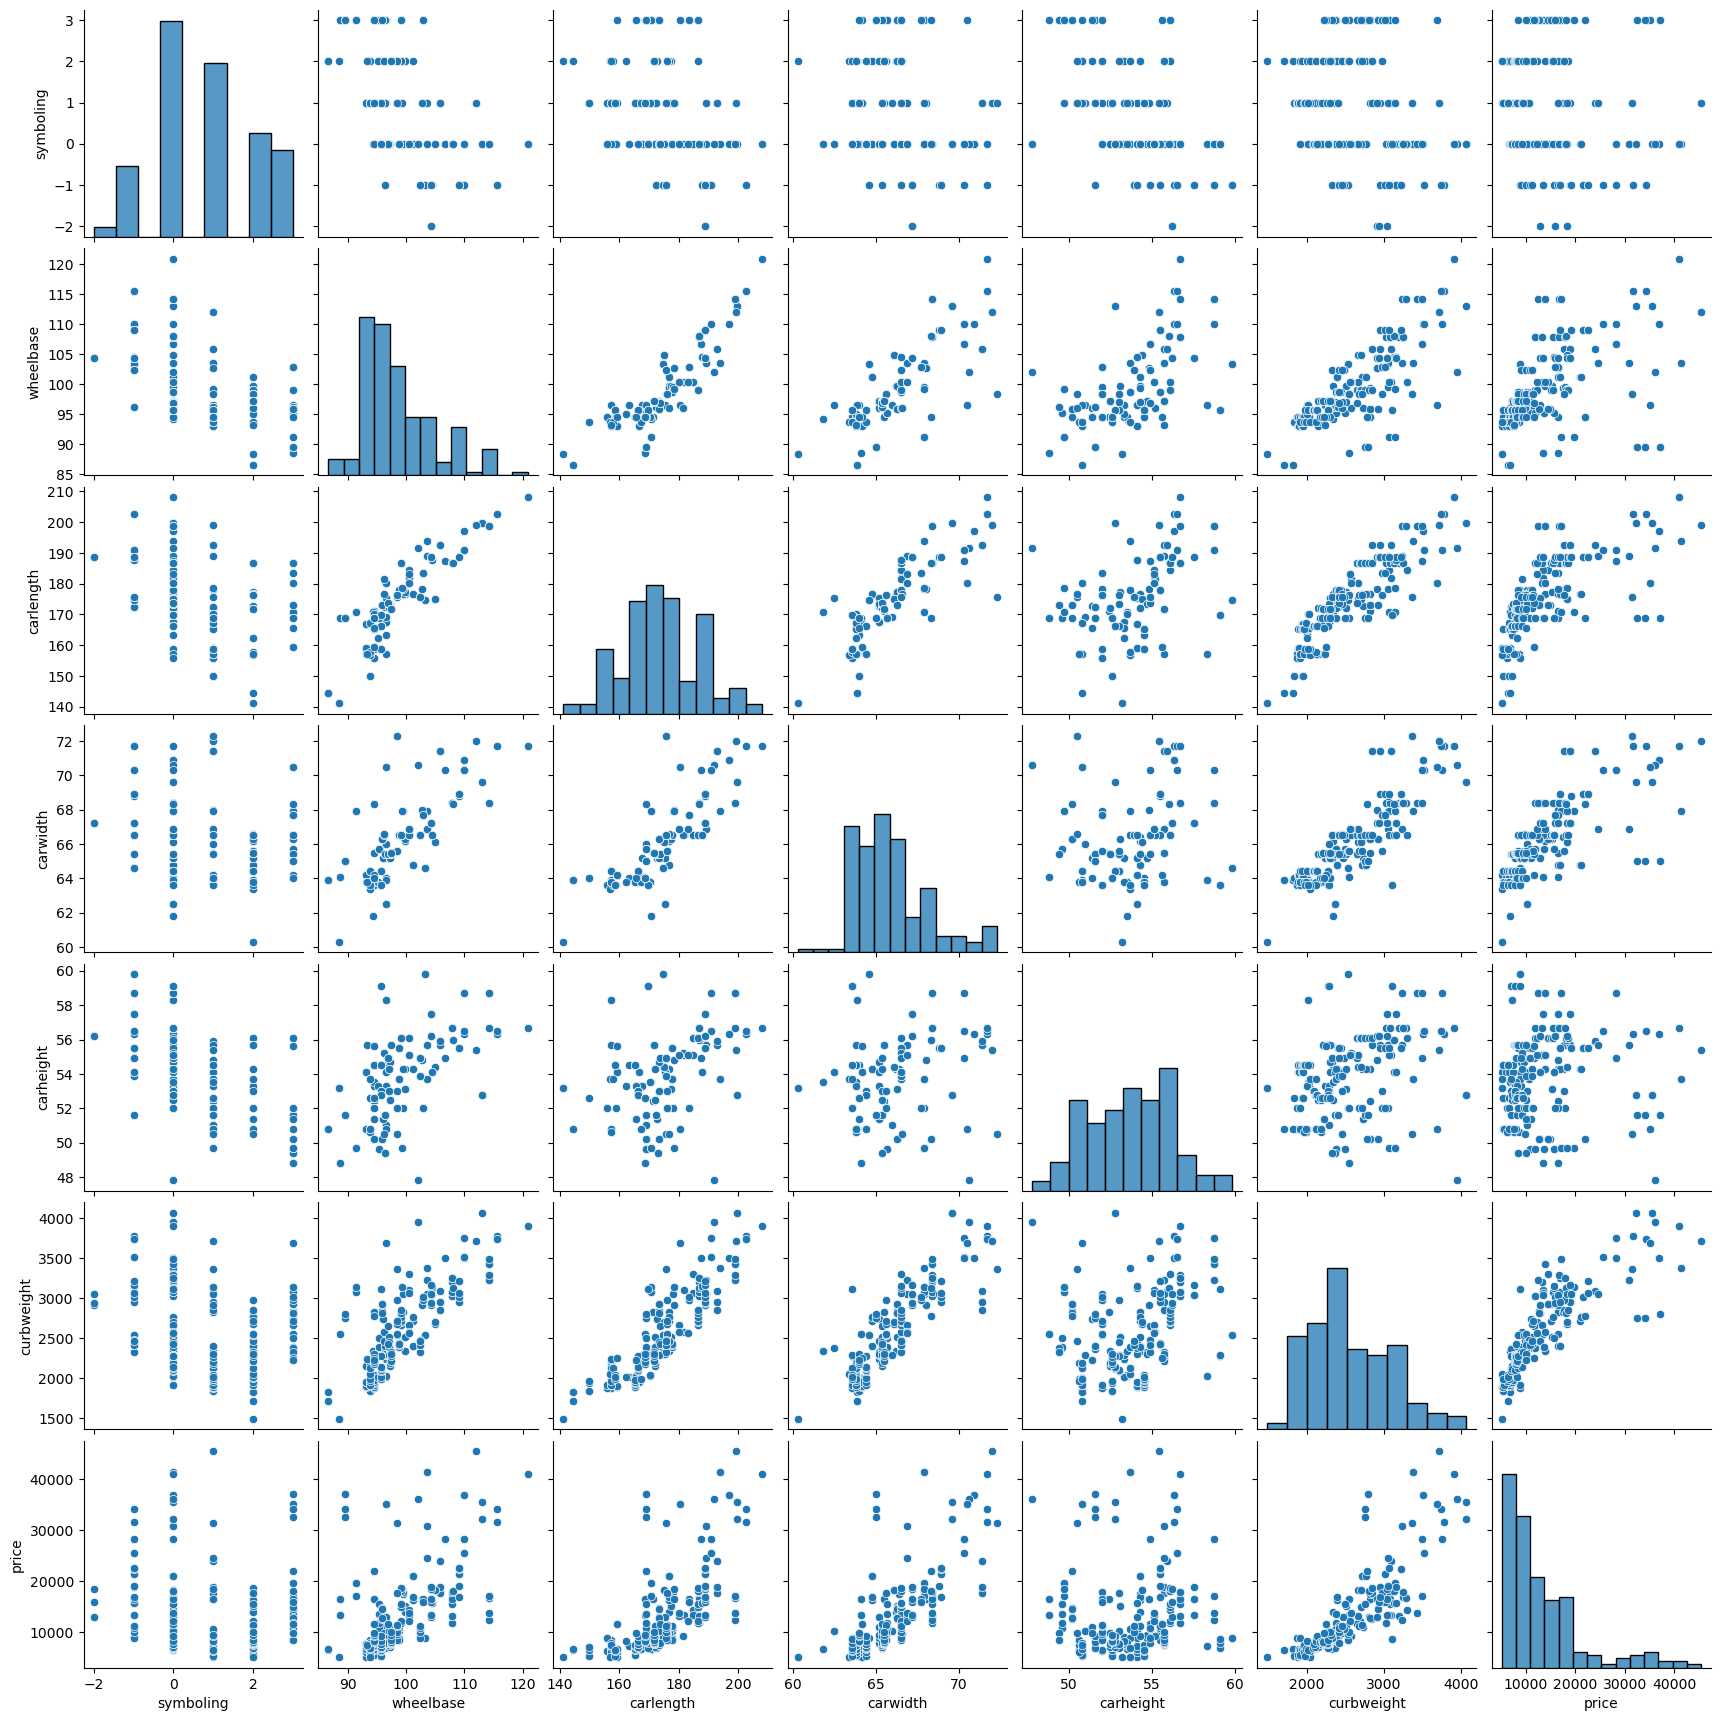

In [50]:
sns.pairplot(df_num[['symboling', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight','price']])

 - Symboling and carhight does not show any significant trend with price.

 - Carlength, carwidth,wheelbase and curbweight have strong posetive corelation with price

 - wheelbase showing colinearity with curbweight,carwidth and carhight

 - carlength showing colinearity with curbweight and carwidth

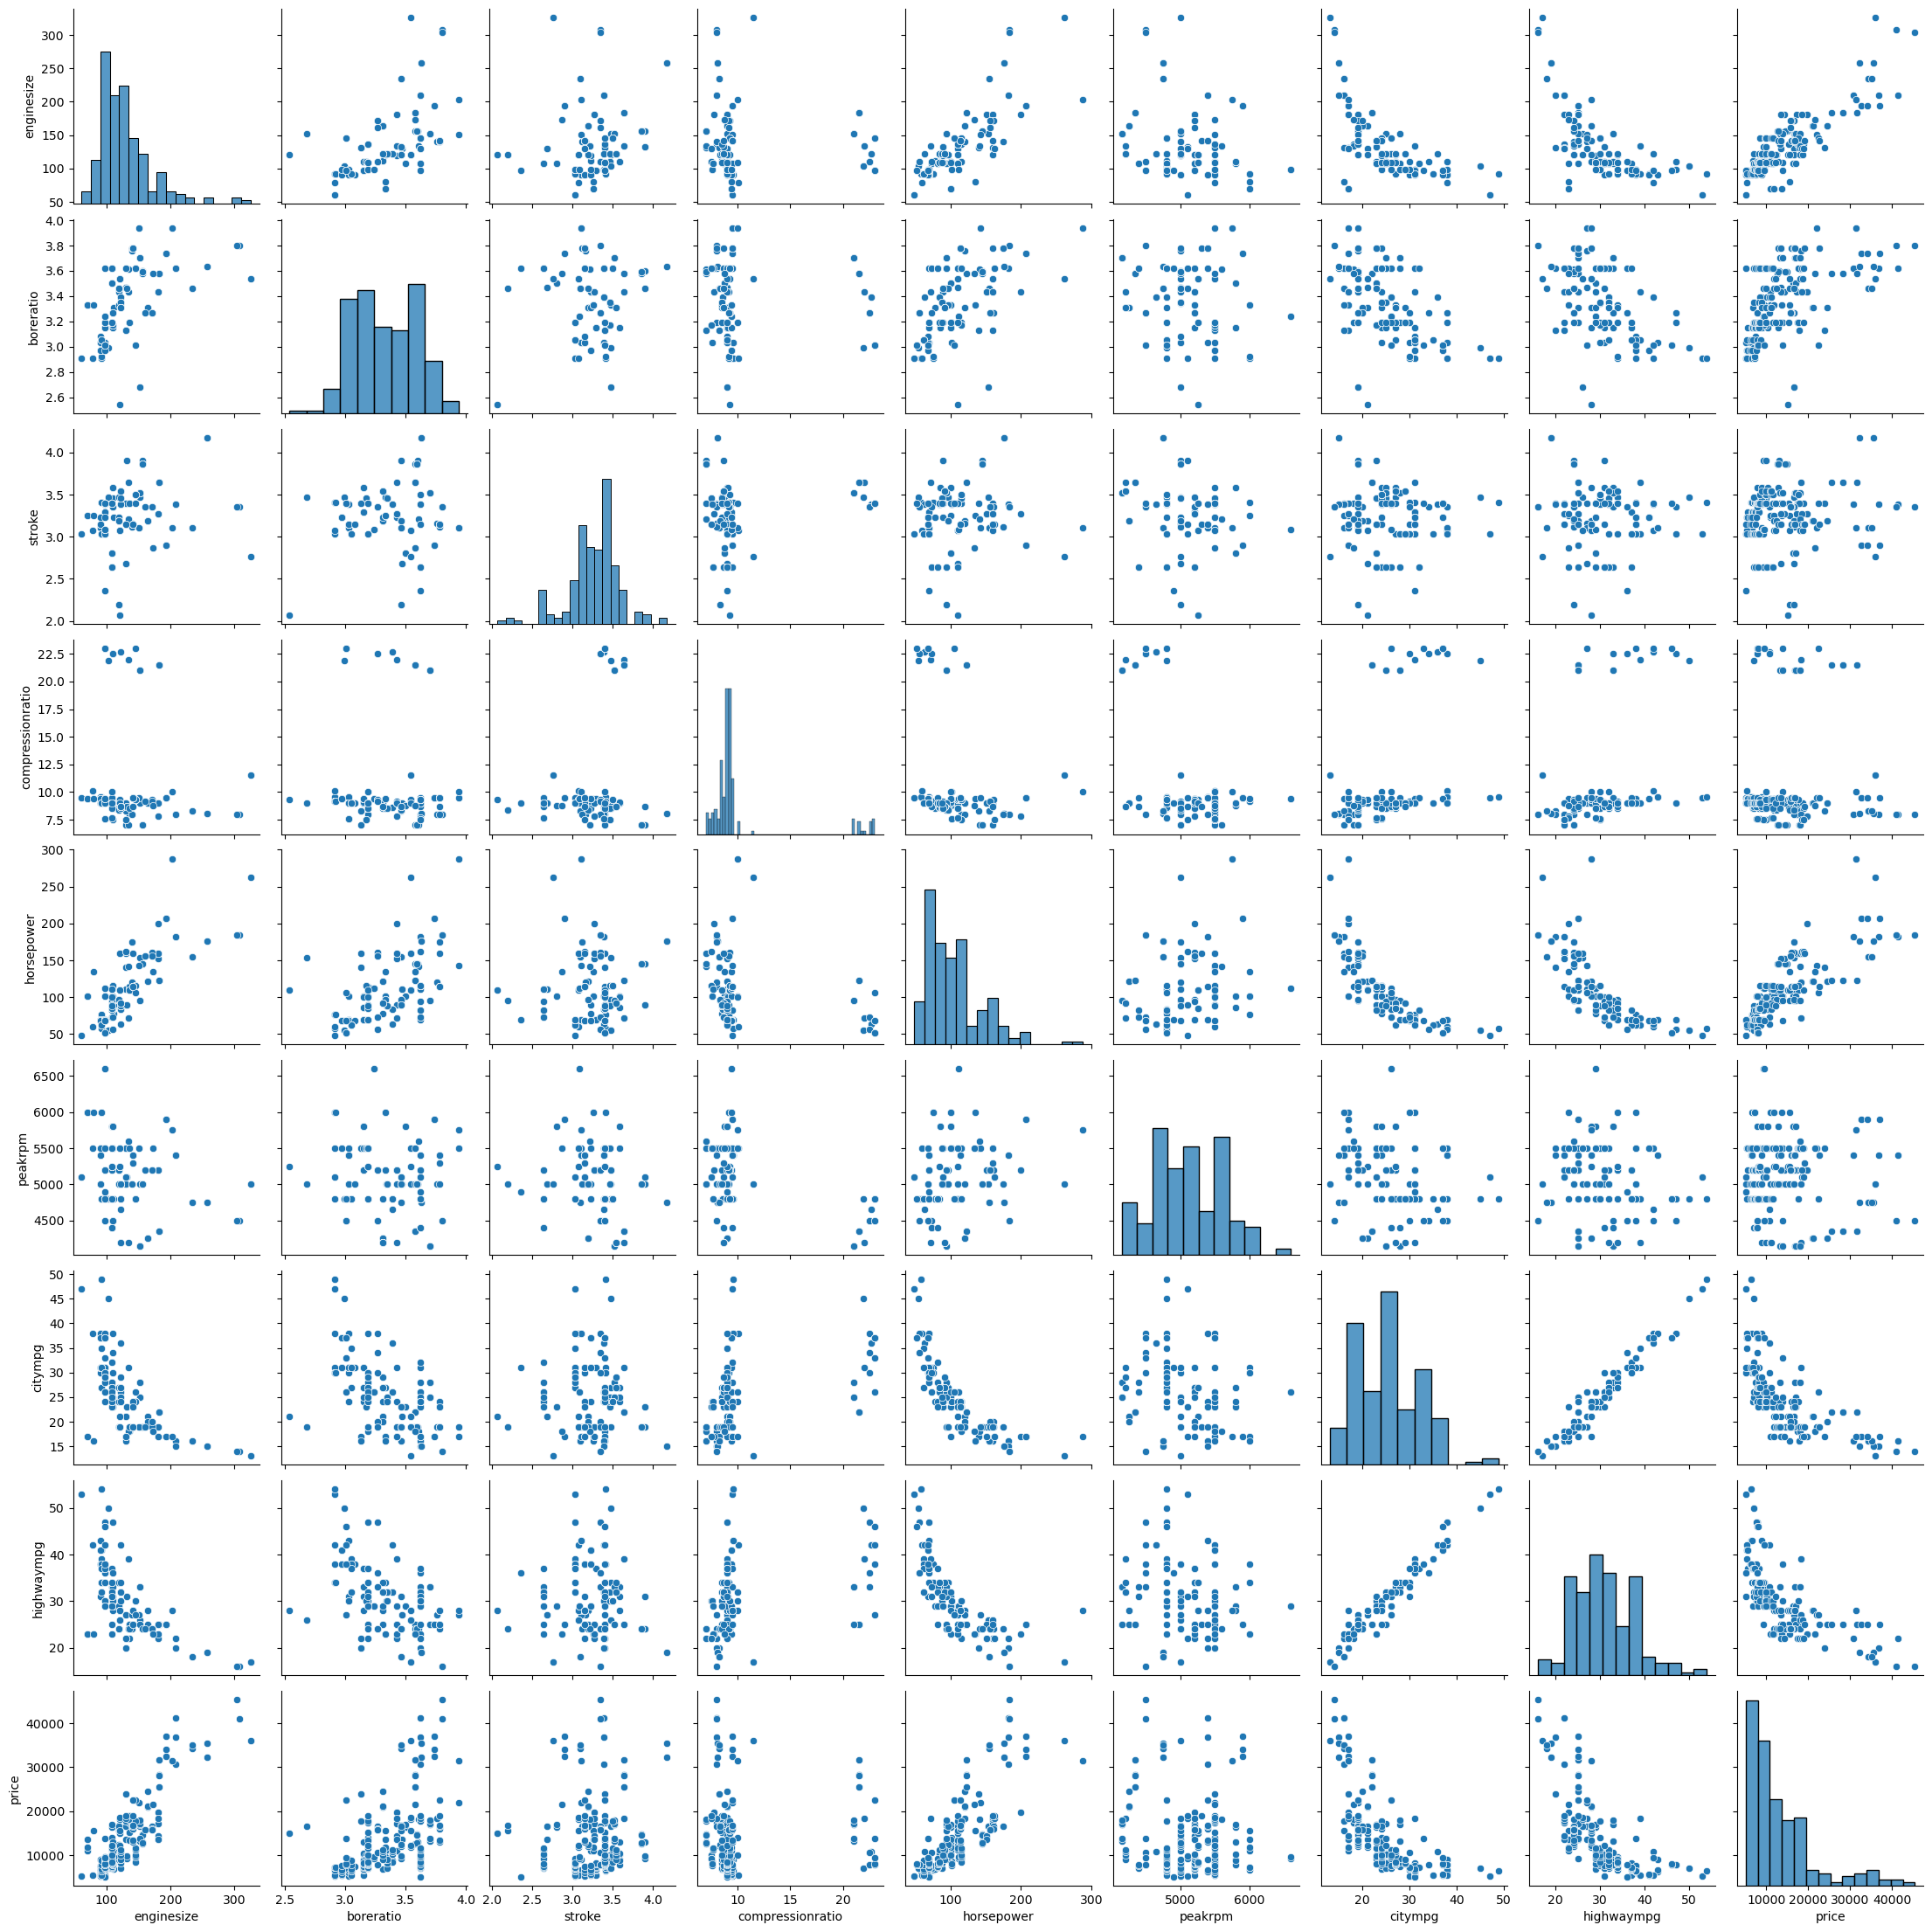

In [52]:
sns.pairplot(df_num[['enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']])

In [ ]:
# Stroke and compressionration and peakrpm dont show any significant trend with price

# enginesize, boreratio, horsepower showing posetive corelation with price

# citympg and highwaympg showing negative corelation with price

# enginesize showing colinearity with horspower highwaympg and citympg

# Significant variables(numeric)

# ['wheelbase', 'carlength', 'carwidth','curbweight', 'enginesize', 'boreratio','stroke','horsepower', 'citympg', 'highwaympg','price']

In [53]:
# citympg and highwaympg both are correlated we can compute new feature avgmpg
df['citympg'].describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: citympg, dtype: float64

In [54]:
df['highwaympg'].describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highwaympg, dtype: float64

In [55]:
df['avgmpg']=.55*df['citympg']+.45*df['highwaympg']

In [56]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price_x',
       'carsrange', 'avgmpg'],
      dtype='object')

In [57]:
df.shape

(205, 27)

In [58]:
df.drop(columns=['citympg','highwaympg'],axis=1,inplace=True)

In [59]:
df.shape

(205, 25)

In [60]:
df.head(5)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price_x,carsrange,avgmpg
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,Medium,23.70
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,Medium,23.70
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,Medium,22.15
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,Medium,26.70
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,Medium,19.80


In [61]:
# Significant variables

# ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'carsrange','wheelbase', 'carlength', 'carwidth','curbweight', 'enginesize', 'boreratio','stroke','horsepower', 'avgmpg','price']



In [62]:
df = df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'carsrange','wheelbase', 'carlength', 'carwidth','curbweight', 'enginesize', 'boreratio','stroke','horsepower', 'avgmpg','price_x']]

In [63]:
df

,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,carsrange,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,avgmpg,price_x
0,gas,std,convertible,rwd,dohc,four,mpfi,Medium,88.6,168.8,64.1,2548,130,3.47,2.68,111,23.70,13495.0
1,gas,std,convertible,rwd,dohc,four,mpfi,Medium,88.6,168.8,64.1,2548,130,3.47,2.68,111,23.70,16500.0
2,gas,std,hatchback,rwd,ohcv,six,mpfi,Medium,94.5,171.2,65.5,2823,152,2.68,3.47,154,22.15,16500.0
3,gas,std,sedan,fwd,ohc,four,mpfi,Medium,99.8,176.6,66.2,2337,109,3.19,3.40,102,26.70,13950.0
4,gas,std,sedan,4wd,ohc,five,mpfi,Medium,99.4,176.6,66.4,2824,136,3.19,3.40,115,19.80,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,ohc,four,mpfi,Medium,109.1,188.8,68.9,2952,141,3.78,3.15,114,25.25,16845.0
201,gas,turbo,sedan,rwd,ohc,four,mpfi,Medium,109.1,188.8,68.8,3049,141,3.78,3.15,160,21.70,19045.0
202,gas,std,sedan,rwd,ohcv,six,mpfi,Medium,109.1,188.8,68.9,3012,173,3.58,2.87,134,20.25,21485.0
203,diesel,turbo,sedan,rwd,ohc,six,idi,Medium,109.1,188.8,68.9,3217,145,3.01,3.40,106,26.45,22470.0


In [64]:
df.shape

(205, 18)

In [65]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [67]:
sc

MinMaxScaler()

In [66]:
# significant Numeric Columns
numeric_columns = ['wheelbase', 'carlength', 'carwidth','curbweight', 'enginesize', 'boreratio','stroke','horsepower', 'avgmpg']

In [68]:
numeric_columns

['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'avgmpg']

In [69]:
df[numeric_columns] = sc.fit_transform(df[numeric_columns])

In [70]:
df[numeric_columns]

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,avgmpg
0,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.290476,0.262500,0.244170
1,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.290476,0.262500,0.244170
2,0.230321,0.449254,0.433333,0.517843,0.343396,0.100000,0.666667,0.441667,0.201646
3,0.384840,0.529851,0.491667,0.329325,0.181132,0.464286,0.633333,0.225000,0.326475
4,0.373178,0.529851,0.508333,0.518231,0.283019,0.464286,0.633333,0.279167,0.137174
...,...,...,...,...,...,...,...,...,...
200,0.655977,0.711940,0.716667,0.567882,0.301887,0.885714,0.514286,0.275000,0.286694
201,0.655977,0.711940,0.708333,0.605508,0.301887,0.885714,0.514286,0.466667,0.189300
202,0.655977,0.711940,0.716667,0.591156,0.422642,0.742857,0.380952,0.358333,0.149520
203,0.655977,0.711940,0.716667,0.670675,0.316981,0.335714,0.633333,0.241667,0.319616


In [71]:
df

,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,carsrange,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,avgmpg,price_x
0,gas,std,convertible,rwd,dohc,four,mpfi,Medium,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.290476,0.262500,0.244170,13495.0
1,gas,std,convertible,rwd,dohc,four,mpfi,Medium,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.290476,0.262500,0.244170,16500.0
2,gas,std,hatchback,rwd,ohcv,six,mpfi,Medium,0.230321,0.449254,0.433333,0.517843,0.343396,0.100000,0.666667,0.441667,0.201646,16500.0
3,gas,std,sedan,fwd,ohc,four,mpfi,Medium,0.384840,0.529851,0.491667,0.329325,0.181132,0.464286,0.633333,0.225000,0.326475,13950.0
4,gas,std,sedan,4wd,ohc,five,mpfi,Medium,0.373178,0.529851,0.508333,0.518231,0.283019,0.464286,0.633333,0.279167,0.137174,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,ohc,four,mpfi,Medium,0.655977,0.711940,0.716667,0.567882,0.301887,0.885714,0.514286,0.275000,0.286694,16845.0
201,gas,turbo,sedan,rwd,ohc,four,mpfi,Medium,0.655977,0.711940,0.708333,0.605508,0.301887,0.885714,0.514286,0.466667,0.189300,19045.0
202,gas,std,sedan,rwd,ohcv,six,mpfi,Medium,0.655977,0.711940,0.716667,0.591156,0.422642,0.742857,0.380952,0.358333,0.149520,21485.0
203,diesel,turbo,sedan,rwd,ohc,six,idi,Medium,0.655977,0.711940,0.716667,0.670675,0.316981,0.335714,0.633333,0.241667,0.319616,22470.0


In [72]:
# Features dummification

In [73]:
cat_columns = ['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','carsrange']
df = pd.get_dummies(df,columns=['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','carsrange'],drop_first=True)

In [74]:
cat_columns

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'carsrange']

In [75]:
df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,avgmpg,price_x,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carsrange_Medium,carsrange_Highend
0,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.290476,0.262500,0.244170,13495.0,...,0,0,0,0,0,1,0,0,1,0
1,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.290476,0.262500,0.244170,16500.0,...,0,0,0,0,0,1,0,0,1,0
2,0.230321,0.449254,0.433333,0.517843,0.343396,0.100000,0.666667,0.441667,0.201646,16500.0,...,0,0,0,0,0,1,0,0,1,0
3,0.384840,0.529851,0.491667,0.329325,0.181132,0.464286,0.633333,0.225000,0.326475,13950.0,...,0,0,0,0,0,1,0,0,1,0
4,0.373178,0.529851,0.508333,0.518231,0.283019,0.464286,0.633333,0.279167,0.137174,17450.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.655977,0.711940,0.716667,0.567882,0.301887,0.885714,0.514286,0.275000,0.286694,16845.0,...,0,0,0,0,0,1,0,0,1,0
201,0.655977,0.711940,0.708333,0.605508,0.301887,0.885714,0.514286,0.466667,0.189300,19045.0,...,0,0,0,0,0,1,0,0,1,0
202,0.655977,0.711940,0.716667,0.591156,0.422642,0.742857,0.380952,0.358333,0.149520,21485.0,...,0,0,0,0,0,1,0,0,1,0
203,0.655977,0.711940,0.716667,0.670675,0.316981,0.335714,0.633333,0.241667,0.319616,22470.0,...,0,0,0,1,0,0,0,0,1,0


In [76]:
df.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'horsepower', 'avgmpg', 'price_x',
       'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'carsrange_Medium', 'carsrange_Highend'],
      dtype='object')

In [77]:
# Check Correlation b/w all features using heatmap

<AxesSubplot:>

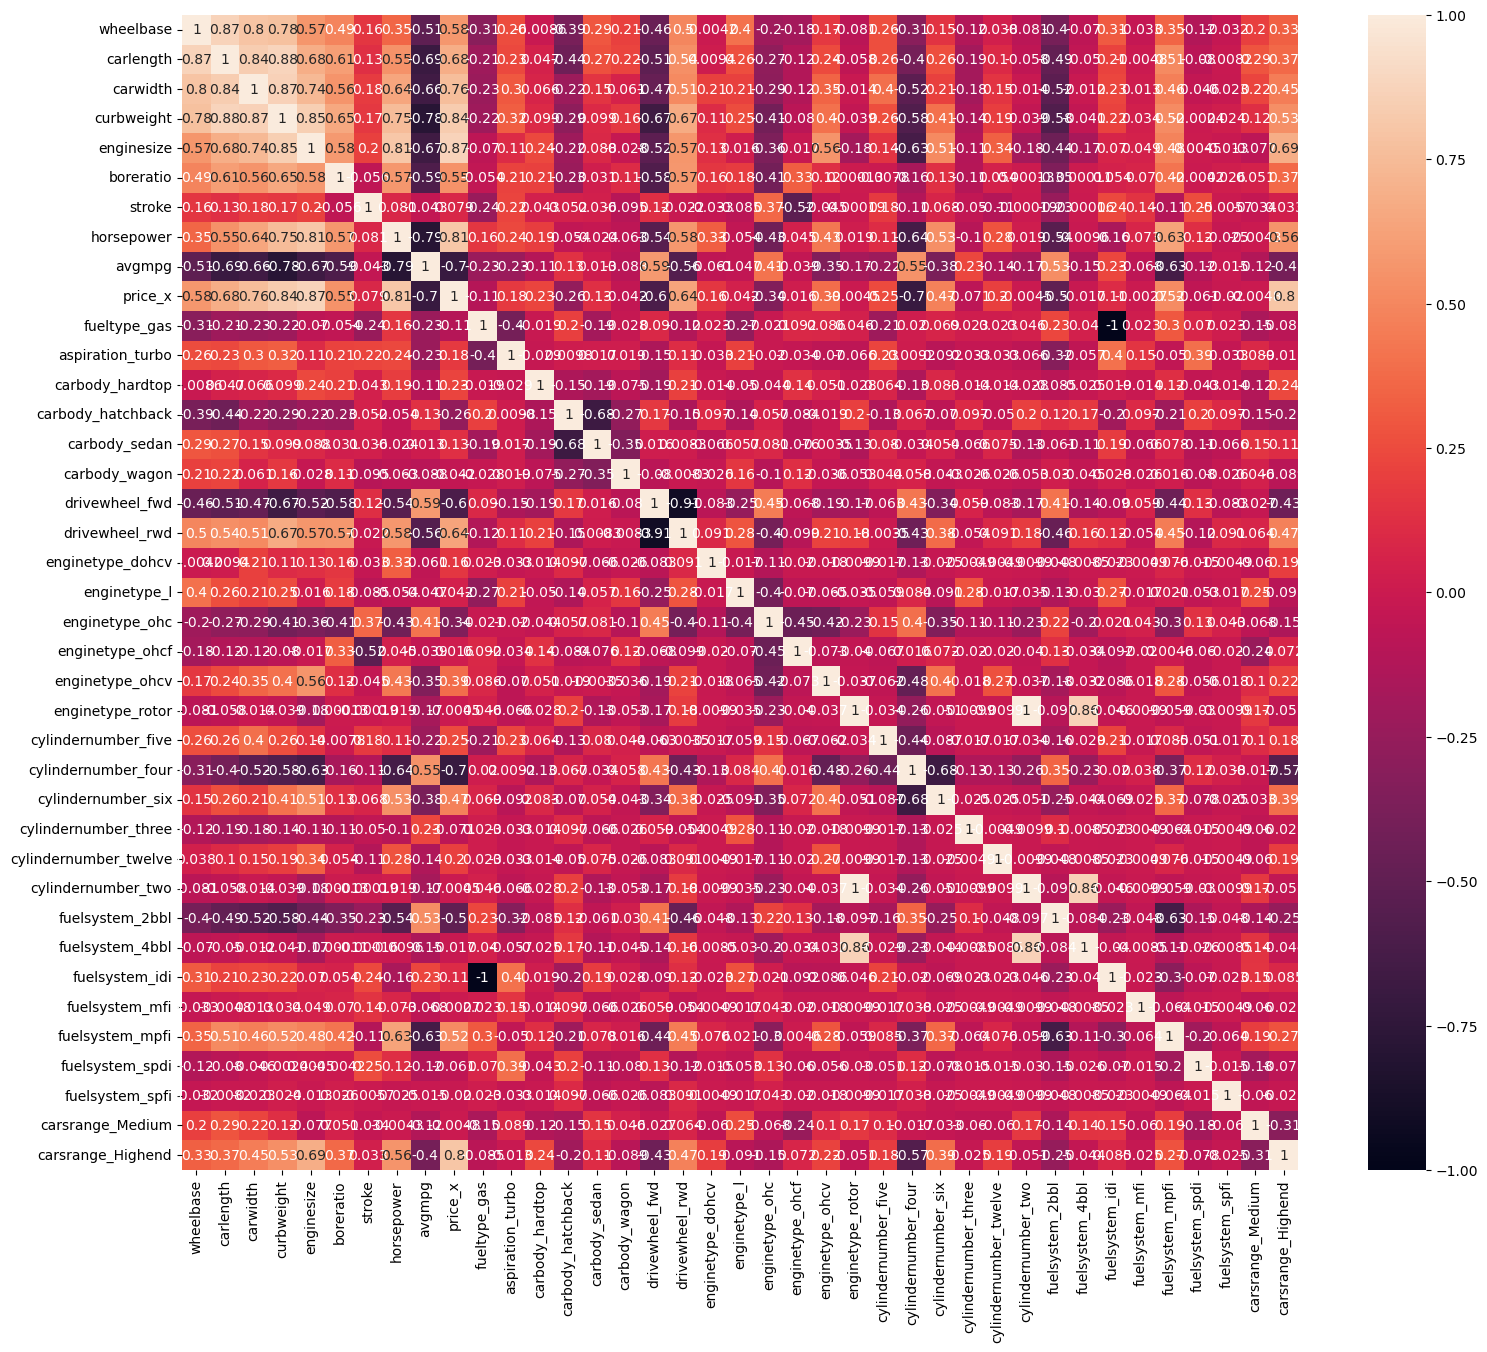

In [78]:
fig,ax=plt.subplots(1,1,figsize=(18,15))
sns.heatmap(df.corr(),annot=True)

In [79]:
# Some of variables showing strong positive correlation and some of negative.

# Need to treat Multicolinearity.

# 2- use of VIF

In [81]:
df.shape

(205, 39)

In [80]:
y=df['price_x']
X=df.drop('price_x',axis=1)

In [83]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price_x, Length: 205, dtype: float64

In [85]:
X

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,avgmpg,fueltype_gas,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carsrange_Medium,carsrange_Highend
0,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.290476,0.262500,0.244170,1,...,0,0,0,0,0,1,0,0,1,0
1,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.290476,0.262500,0.244170,1,...,0,0,0,0,0,1,0,0,1,0
2,0.230321,0.449254,0.433333,0.517843,0.343396,0.100000,0.666667,0.441667,0.201646,1,...,0,0,0,0,0,1,0,0,1,0
3,0.384840,0.529851,0.491667,0.329325,0.181132,0.464286,0.633333,0.225000,0.326475,1,...,0,0,0,0,0,1,0,0,1,0
4,0.373178,0.529851,0.508333,0.518231,0.283019,0.464286,0.633333,0.279167,0.137174,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.655977,0.711940,0.716667,0.567882,0.301887,0.885714,0.514286,0.275000,0.286694,1,...,0,0,0,0,0,1,0,0,1,0
201,0.655977,0.711940,0.708333,0.605508,0.301887,0.885714,0.514286,0.466667,0.189300,1,...,0,0,0,0,0,1,0,0,1,0
202,0.655977,0.711940,0.716667,0.591156,0.422642,0.742857,0.380952,0.358333,0.149520,1,...,0,0,0,0,0,1,0,0,1,0
203,0.655977,0.711940,0.716667,0.670675,0.316981,0.335714,0.633333,0.241667,0.319616,0,...,0,0,0,1,0,0,0,0,1,0


### Train-Test Split and feature scaling

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=100)

In [86]:
X_train

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,avgmpg,fueltype_gas,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carsrange_Medium,carsrange_Highend
96,0.230321,0.361194,0.291667,0.187355,0.135849,0.435714,0.580952,0.087500,0.518519,1,...,0,1,0,0,0,0,0,0,1,0
177,0.460641,0.514925,0.516667,0.376261,0.230189,0.550000,0.700000,0.183333,0.396433,1,...,0,0,0,0,0,1,0,0,0,0
181,0.521866,0.697015,0.516667,0.645074,0.377358,0.521429,0.609524,0.450000,0.176955,1,...,0,0,0,0,0,1,0,0,0,0
97,0.230321,0.434328,0.291667,0.212956,0.135849,0.435714,0.580952,0.087500,0.518519,1,...,0,1,0,0,0,0,0,0,1,0
120,0.206997,0.241791,0.291667,0.185803,0.109434,0.307143,0.552381,0.083333,0.530864,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.282799,0.467164,0.425000,0.354926,0.184906,0.450000,0.661905,0.283333,0.311385,1,...,0,0,0,0,0,0,1,0,0,0
103,0.402332,0.649254,0.516667,0.609775,0.452830,0.635714,0.571429,0.433333,0.189300,1,...,0,0,0,0,0,1,0,0,1,0
67,0.682216,0.743284,0.833333,0.786268,0.460377,0.742857,0.747619,0.312500,0.234568,0,...,0,0,0,1,0,0,0,0,0,1
24,0.206997,0.241791,0.291667,0.185803,0.109434,0.307143,0.552381,0.083333,0.530864,1,...,0,1,0,0,0,0,0,0,0,0


In [87]:
X_test

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,avgmpg,fueltype_gas,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carsrange_Medium,carsrange_Highend
160,0.265306,0.376119,0.341667,0.235066,0.139623,0.464286,0.457143,0.091667,0.747599,1,...,0,1,0,0,0,0,0,0,0,0
186,0.311953,0.456716,0.433333,0.305275,0.181132,0.464286,0.633333,0.154167,0.421125,1,...,0,0,0,0,0,1,0,0,1,0
59,0.355685,0.547761,0.516667,0.347944,0.230189,0.607143,0.628571,0.150000,0.381344,1,...,0,1,0,0,0,0,0,0,1,0
165,0.230321,0.411940,0.308333,0.301396,0.139623,0.500000,0.480952,0.266667,0.344307,1,...,0,0,0,0,0,1,0,0,0,0
140,0.195335,0.241791,0.291667,0.291699,0.177358,0.771429,0.271429,0.104167,0.368999,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.230321,0.414925,0.666667,0.500388,0.339623,1.000000,0.495238,0.395833,0.213992,1,...,0,0,0,0,0,1,0,0,0,1
166,0.230321,0.411940,0.308333,0.314973,0.139623,0.500000,0.480952,0.266667,0.344307,1,...,0,0,0,0,0,1,0,0,0,0
1,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.290476,0.262500,0.244170,1,...,0,0,0,0,0,1,0,0,1,0
199,0.516035,0.711940,0.575000,0.647401,0.260377,0.771429,0.514286,0.475000,0.122085,1,...,0,0,0,0,0,1,0,0,1,0


In [88]:
y_train

96      7499.0
177    11248.0
181    15750.0
97      7999.0
120     6229.0
        ...   
87      9279.0
103    13499.0
67     25552.0
24      6229.0
8      23875.0
Name: price_x, Length: 137, dtype: float64

In [89]:
y_test

160     7738.0
186     8495.0
59      8845.0
165     9298.0
140     7603.0
        ...   
125    22018.0
166     9538.0
1      16500.0
199    18950.0
190     9980.0
Name: price_x, Length: 68, dtype: float64

### Feature Selection

In [90]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
model=LinearRegression()
param_dist = {'n_features_to_select': np.arange(1, X_train.shape[1] + 1)}
rfe=RFE(model)
random_search = RandomizedSearchCV(estimator=rfe,param_distributions=param_dist,n_iter=15, cv=5,random_state=100)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RFE(estimator=LinearRegression()), n_iter=15,
                   param_distributions={'n_features_to_select': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38])},
                   random_state=100)

In [91]:
# Get the best parameter value and best score
best_n_features = random_search.best_params_['n_features_to_select']
best_score = random_search.best_score_
print(best_n_features,best_score)

6 0.8747779935580711


In [92]:
rfe=RFE(model,n_features_to_select=6)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [93]:
rfe.support_

array([False, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True])

In [94]:
rfe.ranking_

array([15, 14,  1,  1,  5,  3,  4,  1, 18, 23, 27, 21, 17, 20, 19, 29, 31,
        1, 22,  9, 13, 10,  6, 24, 11, 30,  1,  2,  8, 26, 28,  7, 32, 25,
       12, 33, 16,  1])

In [95]:
X_train_rfe = X_train.columns[rfe.support_]

In [96]:
X_train_rfe

Index(['carwidth', 'curbweight', 'horsepower', 'enginetype_dohcv',
       'cylindernumber_three', 'carsrange_Highend'],
      dtype='object')

In [97]:
X_train_rfe = X_train[X_train_rfe]

In [98]:
X_train_rfe

,carwidth,curbweight,horsepower,enginetype_dohcv,cylindernumber_three,carsrange_Highend
96,0.291667,0.187355,0.087500,0,0,0
177,0.516667,0.376261,0.183333,0,0,0
181,0.516667,0.645074,0.450000,0,0,0
97,0.291667,0.212956,0.087500,0,0,0
120,0.291667,0.185803,0.083333,0,0,0
...,...,...,...,...,...,...
87,0.425000,0.354926,0.283333,0,0,0
103,0.516667,0.609775,0.433333,0,0,0
67,0.833333,0.786268,0.312500,0,0,1
24,0.291667,0.185803,0.083333,0,0,0


In [99]:
X_train_rfe.shape

(137, 6)

In [100]:
X_train_rfe.columns

Index(['carwidth', 'curbweight', 'horsepower', 'enginetype_dohcv',
       'cylindernumber_three', 'carsrange_Highend'],
      dtype='object')

### Model Builing

 - Building model using statsmodel, for the detailed statistics

In [101]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
def build_model(X,y):
  X=sm.add_constant(X)
  lm=sm.OLS(y,X).fit()
  print(lm.summary())


def checkVIF(X):
    X=sm.add_constant(X)
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [103]:
build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                price_x   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     262.1
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           4.62e-70
Time:                        12:50:12   Log-Likelihood:                -1247.1
No. Observations:                 137   AIC:                             2508.
Df Residuals:                     130   BIC:                             2529.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  683.1051 

In [104]:
# cylindernumber_three showinh highest P value and its greter than significant value .05

# Remodel with without cylindernumber_three , it showing insignicance for model

In [105]:
X_train_new = X_train_rfe.drop(columns=['cylindernumber_three' ],axis=1)

In [106]:
X_train_new

,carwidth,curbweight,horsepower,enginetype_dohcv,carsrange_Highend
96,0.291667,0.187355,0.087500,0,0
177,0.516667,0.376261,0.183333,0,0
181,0.516667,0.645074,0.450000,0,0
97,0.291667,0.212956,0.087500,0,0
120,0.291667,0.185803,0.083333,0,0
...,...,...,...,...,...
87,0.425000,0.354926,0.283333,0,0
103,0.516667,0.609775,0.433333,0,0
67,0.833333,0.786268,0.312500,0,1
24,0.291667,0.185803,0.083333,0,0


In [107]:
build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                price_x   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     307.3
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           1.58e-70
Time:                        12:51:02   Log-Likelihood:                -1249.1
No. Observations:                 137   AIC:                             2510.
Df Residuals:                     131   BIC:                             2528.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               965.3005    566.65

In [108]:
checkVIF(X_train_new)

,Features,VIF
0,const,8.65
2,curbweight,6.83
1,carwidth,4.76
3,horsepower,3.11
5,carsrange_Highend,1.60
4,enginetype_dohcv,1.44


In [109]:
# curbweight Showing VIF more then 5

In [110]:
X_train_new=X_train_new.drop(columns=['curbweight'],axis=1)
build_model(X_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                price_x   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     359.6
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           6.43e-70
Time:                        12:51:44   Log-Likelihood:                -1253.7
No. Observations:                 137   AIC:                             2517.
Df Residuals:                     132   BIC:                             2532.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               713.2680    577.50

In [111]:
checkVIF(X_train_new)

,Features,VIF
0,const,8.47
2,horsepower,2.38
1,carwidth,1.96
4,carsrange_Highend,1.51
3,enginetype_dohcv,1.19


In [112]:
# P value and VIF for all features showing significant value, check error term


<AxesSubplot:ylabel='Density'>

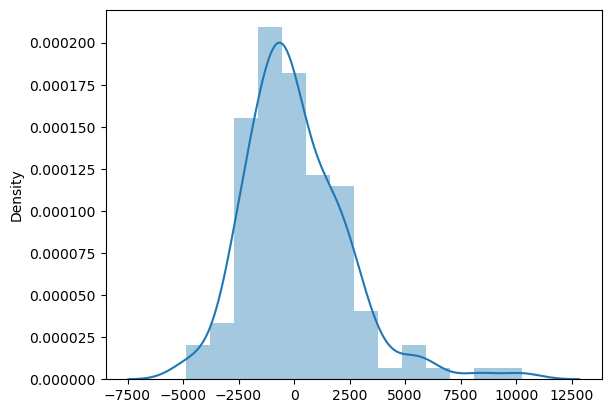

In [113]:
lm=sm.OLS(y_train,X_train_new).fit()
y_train_pred=lm.predict(X_train_new)

sns.distplot(y_train-y_train_pred)

In [114]:
# P value less then .05 for all variables as VIF also lower then 5 but error term not normaly distributed, lets check remove some other

In [115]:
X_train_new = X_train_new.drop(columns=['enginetype_dohcv'],axis=1)

In [116]:
X_train_new

,carwidth,horsepower,carsrange_Highend
96,0.291667,0.087500,0
177,0.516667,0.183333,0
181,0.516667,0.450000,0
97,0.291667,0.087500,0
120,0.291667,0.083333,0
...,...,...,...
87,0.425000,0.283333,0
103,0.516667,0.433333,0
67,0.833333,0.312500,1
24,0.291667,0.083333,0


In [117]:
build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                price_x   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     397.4
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           3.54e-66
Time:                        12:54:05   Log-Likelihood:                -1265.8
No. Observations:                 137   AIC:                             2540.
Df Residuals:                     133   BIC:                             2551.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1109.6540    622.87

In [118]:
# 1-Prob ( F-Statistic ) 3.54 * 10^-66 is approximate 0 and less then .05, it showing model is significance .

# 2- All independent variable showing p value zero, its indicate all independent variables are significant.

# 3- R2 = 90 and AdjR2 89.7 R2 and Adj R2 is approximately same it is indicate that there is one insignifcant variable.

### Check OLS Assumption

In [119]:
# 1- Check Multicollinearty

# By VIF already checked

# By model summary C.No is 11.9 is less then 100 and indicates that there is no multicollinerity existance.

# 2- Check the existence of linear relationship b/w independent and dependent variable.

In [120]:
lm=sm.OLS(y_train,X_train_new).fit()
y_train_pred=lm.predict(X_train_new)
error=(y_train-y_train_pred)

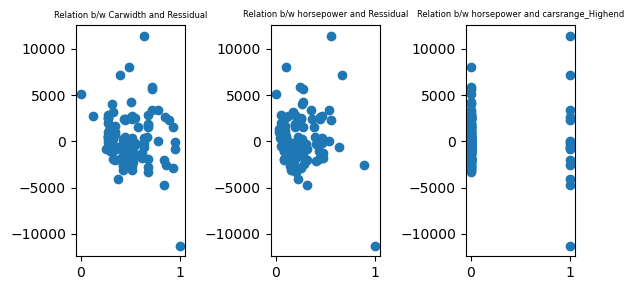

In [121]:
fig,ax=plt.subplots(1,3,figsize=(6,3))
ax[0].scatter(x=X_train['carwidth'],y=error)
ax[0].set_title('Relation b/w Carwidth and Ressidual',size=6)
ax[1].scatter(x=X_train['horsepower'],y=error)
ax[1].set_title('Relation b/w horsepower and Ressidual',size=6)
ax[2].scatter(x=X_train['carsrange_Highend'],y=error)
ax[2].set_title('Relation b/w horsepower and carsrange_Highend',size=6)
plt.tight_layout()
plt.show();

In [122]:
# 3- Check Autocorrelation for error term.

# It can be checked by Durbin weston, if DB=2 No autocorelation, if DB>2, DB<2, -ve and +ve correlation exist

# Model DB is 2.018, its almost equal to 2 so it indicate that there are no autocorrelation presence in ressidual.

### 3- Check homoscedasticity of error term.

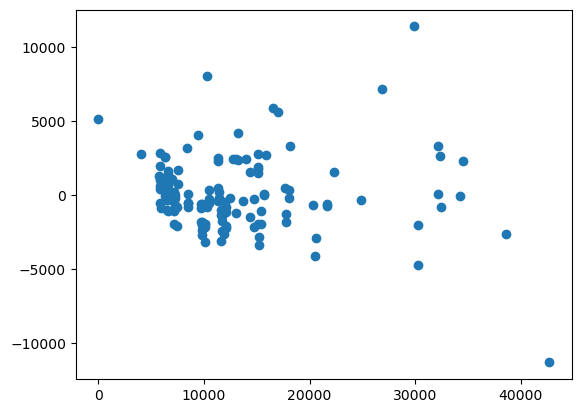

In [126]:
plt.scatter(x=y_train_pred,y=error)
plt.show()

In [127]:
# Most of value under the range 5000 to -5000, it showing constant varience with predicted value. there are 2, 3 points outof limit.

# Check Error normaly distribute or not

# prob(Jarque-Bera) showing value near about 0 its indicate error normaly distributed.

In [131]:
print(error.skew())

0.5184923449555267


In [132]:
print(error.kurtosis())


5.547002667327703


In [133]:
# Skewness and kurtosis value should be zero for a good fit model

### Model Prediction

<AxesSubplot:ylabel='Density'>

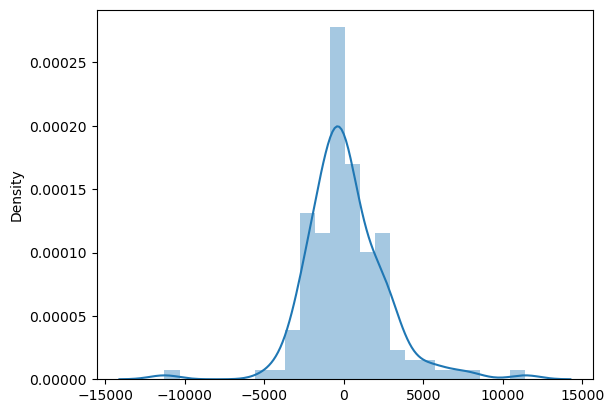

In [134]:
sns.distplot(y_train-y_train_pred)

In [135]:
# Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

### Prediction Evalution

In [136]:
X_test_new = X_test[X_train_new.columns]

In [137]:
X_test_new = sm.add_constant(X_test_new)

In [139]:
X_test_new

,const,carwidth,horsepower,carsrange_Highend
160,1.0,0.341667,0.091667,0
186,1.0,0.433333,0.154167,0
59,1.0,0.516667,0.150000,0
165,1.0,0.308333,0.266667,0
140,1.0,0.291667,0.104167,0
...,...,...,...,...
125,1.0,0.666667,0.395833,1
166,1.0,0.308333,0.266667,0
1,1.0,0.316667,0.262500,0
199,1.0,0.575000,0.475000,0


In [140]:
X_train_new.columns

Index(['carwidth', 'horsepower', 'carsrange_Highend'], dtype='object')

In [141]:
X_test_new.columns

Index(['const', 'carwidth', 'horsepower', 'carsrange_Highend'], dtype='object')

In [142]:
lm=sm.OLS(y_test,X_test_new).fit()


In [143]:
lm

In [144]:
y_pred = lm.predict(X_test_new)

In [145]:
y_pred

160     7275.511224
186     9838.966892
59     10924.428070
165    10379.777205
140     6828.375889
           ...     
125    30087.279118
166    10379.777205
1      10411.770308
199    18378.386726
190     8508.481293
Length: 68, dtype: float64

In [146]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

In [147]:
R2_train=r2_score(y_train_pred,y_train)
R2_test=r2_score(y_pred,y_test)
print(R2_train," ",R2_test)
# Check RMS
RMSE_train=np.sqrt(mean_squared_error(y_train_pred,y_train))
RMSE_test=np.sqrt(mean_squared_error(y_pred,y_test))
print(RMSE_train," ",RMSE_test)

0.8921866004723615   0.8870125498762708
2521.4385338888137   2596.018986113262


In [148]:
error_test=(y_pred-y_test)
print(error_test.skew(),error_test.kurtosis())

-0.13487778094239933 1.5151414628367208


<AxesSubplot:ylabel='Density'>

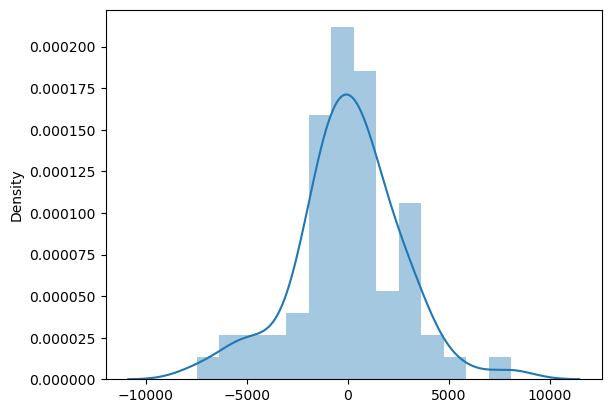

In [149]:
sns.distplot(error_test)

In [150]:
# Prob(Jarque Bera) value more then .05 indicate that, error_test not normaly distributed, and the distplot also showing the same.

In [151]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                price_x   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     188.8
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           9.93e-32
Time:                        13:03:45   Log-Likelihood:                -631.09
No. Observations:                  68   AIC:                             1270.
Df Residuals:                      64   BIC:                             1279.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               605.0830   1032.33

Text(0, 0.5, 'y_pred')

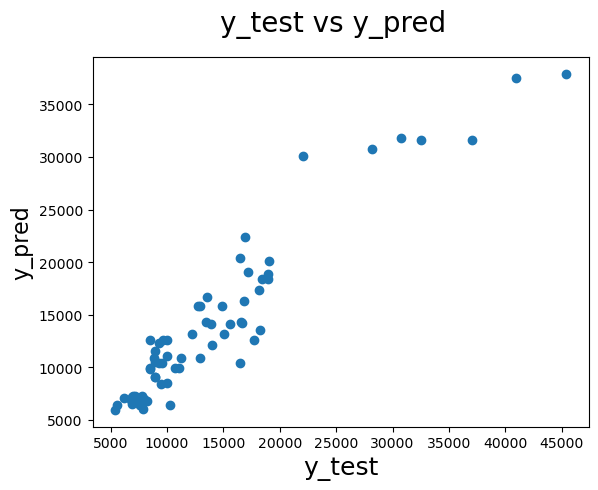

In [152]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

### inference :

 - 1-R-sqaured and Adjusted R-squared (extent of fit) - 0.898 and 0.894 - 90% variance explained.

 - 2-F-stats and Prob(F-stats) (overall model fit) - 188.0 and 9.93e-32(approx. 0.0) - Model fir is significant and explained 90% variance is just not by chance.

 - 3-p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

 - 4-C.No is 11.9 which indicate no multicollinerity presence.

 - 5-Model DB is 2.018, its almost equal to 2 so it indicate that there are no autocorrelation presence in ressidual.

 - 6-Homoscdesticity,Most of value under the range 5000 to -5000, but there are some data points slighlty spred in both side. its indicate error term not constat at some of points.

 - 7-prob(Jarque-Bera) and distplot showing error normaly distributed but skewness and kurtosis is high, it should be near about zero.

 - 8- Predicted Model showing Good Accuration, DB is less then 2 and skewness/Kurtosis better then training model. but JB is high.